# Huamn Activity Recognition ( Deep Learning Models )

In [1]:
import os

os.chdir('E:\Datasets\Human Activity Recognition')

In [2]:
import pandas as pd
import numpy as np

Here we use raw data rather than pre-engineered Signal processing features

We have various .txt files under the directory train > Inertial Signals and test > Inertial Signals

Which contains the following files:

- body_acc_x_train.txt
- body_acc_y_train.txt
- body_acc_z_train.txt
- body_gyro_x_train.txt
- body_gyro_y_train.txt
- body_gyro_z_train.txt
- total_acc_x_train.txt
- total_acc_y_train.txt
- total_acc_z_train.txt

And corresponding _text.txt file under test > Inertial Signals directory

Our Labels are :-
1. Walking     
2. WalkingUpstairs 
3. WalkingDownstairs 
4. Standing 
5. Sitting 
6. Lying.


## Loading the Data

In [3]:
def loadx( dr ): 
    
    # Collecting the name of all .txt files
    os.chdir(f'{dr}\Inertial Signals')
    signals = os.listdir()
    
    data = []
    
    for sig in signals:
        
        data.append( pd.read_csv(sig, delim_whitespace=True, header=None).as_matrix() )
    
    
    os.chdir('..')
    os.chdir('..')
      
    #return data # Shape by this is coming to be (9, 7352, 128)
    return np.transpose( data, (1, 2, 0) )  # shape by this is (7352, 128, 9)

# Transpose is used to change the dimensionality of the output.

In [4]:
def loady( dr ):
    
    os.chdir(f'{dr}')
    file = f'y_{dr}.txt'
    
    data = pd.read_csv(file, delim_whitespace=True, header=None)[0]  # [0] at the end converts dataframe to series
    os.chdir('..')
    
    return pd.get_dummies(data).as_matrix()  # converts each row to a binary 6-D vector and returns as matrix

# We convert our label i,e; y into a 6 dimensional vector
# ex: consider an label is 5 convert it into => [0, 0, 0, 0, 1, 0]
# This conversion is needed for MLPs 

In [5]:
# Loading Train
xtr = loadx('train')
ytr = loady('train')

# Loading Test
xte = loadx('test')
yte = loady('test')

In [6]:
print(xtr.shape, ytr.shape)
print(xte.shape, yte.shape)

(7352, 128, 9) (7352, 6)
(2947, 128, 9) (2947, 6)


In [7]:
xtr[20]

array([[ 1.110451e-03, -5.557761e-03,  9.687449e-04, ...,  1.011267e+00,
        -2.505096e-01, -1.556701e-02],
       [ 6.720449e-04, -5.005509e-03, -2.138752e-03, ...,  1.010825e+00,
        -2.499909e-01, -1.869955e-02],
       [ 1.776720e-04, -4.303683e-03, -3.950164e-03, ...,  1.010328e+00,
        -2.493235e-01, -2.053607e-02],
       ...,
       [ 2.817141e-04,  1.717705e-03,  2.950752e-03, ...,  1.010069e+00,
        -2.412887e-01, -1.444726e-02],
       [ 6.116611e-05,  3.321776e-03,  1.070833e-03, ...,  1.009859e+00,
        -2.396568e-01, -1.630558e-02],
       [-4.270482e-04,  2.718457e-03, -5.560078e-04, ...,  1.009381e+00,
        -2.402332e-01, -1.791109e-02]])

In [8]:
ytr[9]

array([0, 0, 0, 0, 1, 0], dtype=uint8)

In [9]:
import keras

D:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
timestamps = len( xtr[0] )
ipdim = len( xtr[0][0] )
opdim = 6

In [24]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

<font size=3>The <b>Sequential model</b> is a linear stack of layers.

You can create a Sequential model by passing a list of layer instances to the constructor:

```
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([ Dense( 32,  input_shape = ( 784, ) ), Activation('relu'),
                     Dense(10), Activation('softmax') ])  
```

You can also simply add layers via the .add( ) method:

```
model = Sequential()
model.add( Dense( 32,  input_dim = 784 ))
model.add( Activation('relu') )
```
</font>
<i> Ref : https://keras.io/getting-started/sequential-model-guide/ </i>

In [22]:
# Initializing the parameters
epoch = 30
batch = 16
hidden = 32

In [29]:
# Initiliazing the sequential model

model = Sequential()

model.add( LSTM( hidden, input_shape = (timestamps, ipdim)))

# Adding a dropout layer
model.add( Dropout(0.5) )  

# We use dropout layer to avoid Overfitting

<font size=3>
The model needs to know what input shape it should expect. 

For this reason, the first layer in a Sequential model needs to receive information about its input shape. 

We can use input_shape and input_dim to pass the shape of input, output dim 
represent the number of nodes need in that layer here we have 10 nodes
  <br><br>
 
Dense implements the operation : output = activation( dot( input,   kernel ) + bias )    
  
  where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
 
  i.e; output = activation( w.T * x + b )

  
```
keras.layers.Dense( units, activation=None, use_bias=True, 
                    kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                    kernel_regularizer=None, bias_regularizer=None, 
                    activity_regularizer=None, kernel_constraint=None, 
                    bias_constraint=None )
```
  Here, units: Positive integer, dimensionality of the output space.<br><br>
  
 Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

 


```
from keras.layers import Activation, Dense

model.add(Dense(64))
model.add(Activation('tanh'))
  
# This is equivalent to :
model.add(Dense(64, activation='tanh'))
```
there are many activation functions  available ex: tanh, relu, softmax

In [30]:
# Adding a Dense output layer with Sigmoid activation

model.add( Dense( opdim, activation='sigmoid' ))

model.summary()

# here opdim = output dimension

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


<font size=3>
Before training a model, you need to configure the learning process, which is done via the compile method.

It receives three arguments:

<b>An optimizer </b> This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class.

<b>A loss function </b> This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function.

<b>A list of metrics</b> For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.
  
 </font>
 <i>
  
  Ref : https://keras.io/optimizers/
  
  Ref : https://keras.io/losses/

In [31]:
model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

# Note: When using the categorical_crossentropy loss, our targets should be in categorical format 
# (e.g. if we have 10 classes, the target for each sample should be a 10-dimensional vector 
# that is all-zeros except for a 1 at the index corresponding to the class of the sample).

# That is why we converted out labels into vectors

<font size=3>
Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function. 

  
```
fit( x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, 
  validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
  sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None,
  validation_freq=1)```
  
fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

it returns A History object. Its History.history attribute is a record of training loss values and 
metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).



In [32]:
model.fit( xtr, ytr, batch, epoch, validation_data = (xte, yte) )  

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 21s 3ms/step - loss: 1.2949 - acc: 0.4596 - val_loss: 1.0717 - val_acc: 0.5850
Epoch 2/30
7352/7352 [==============================] - 21s 3ms/step - loss: 0.9270 - acc: 0.6250 - val_loss: 0.8835 - val_acc: 0.6732
Epoch 3/30
7352/7352 [==============================] - 20s 3ms/step - loss: 0.7795 - acc: 0.6851 - val_loss: 0.7331 - val_acc: 0.7167
Epoch 4/30
7352/7352 [==============================] - 20s 3ms/step - loss: 0.7499 - acc: 0.6835 - val_loss: 0.6568 - val_acc: 0.7177
Epoch 5/30
7352/7352 [==============================] - 23s 3ms/step - loss: 0.6143 - acc: 0.7500 - val_loss: 0.6804 - val_acc: 0.6977
Epoch 6/30
7352/7352 [==============================] - 20s 3ms/step - loss: 0.5406 - acc: 0.7924 - val_loss: 0.5561 - val_acc: 0.7577
Epoch 7/30
7352/7352 [==============================] - 21s 3ms/step - loss: 0.4966 - acc: 0.8

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# Function to calculate and plot Confusion Matrix

# Since plain confusion_matrix() dosen't work on multilabel data it gives error
# Error : Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

# true labels corresponding with numeric value
activity = { 0: 'Walking', 1: 'WalkingUpstairs', 2: 'WalkingDownstairs', 3: 'Sitting', 4: 'Standing', 5: 'Laying' }

labels = [ 'Laying', 'Sitting', 'Standing', 'Walking', 'WalkingDownstairs', 'WalkingUpstairs' ]

def cm( ytrue, ypred ):
    

    ytrue = pd.Series( [ activity[y] for y in np.argmax( ytrue, axis=1) ] )
    ypred = pd.Series( [ activity[y] for y in np.argmax( ypred, axis=1) ] )

    data = pd.crosstab( ytrue, ypred )

    plt.figure( figsize = (12,6) )

    sns.heatmap( data, annot = True, fmt=".1f", annot_kws={"size": 18}, xticklabels=labels, yticklabels=labels, cmap='Blues_r')
    plt.xticks( rotation=90, size=15 )
    plt.yticks( size=15 )
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()
    
    plt.close()

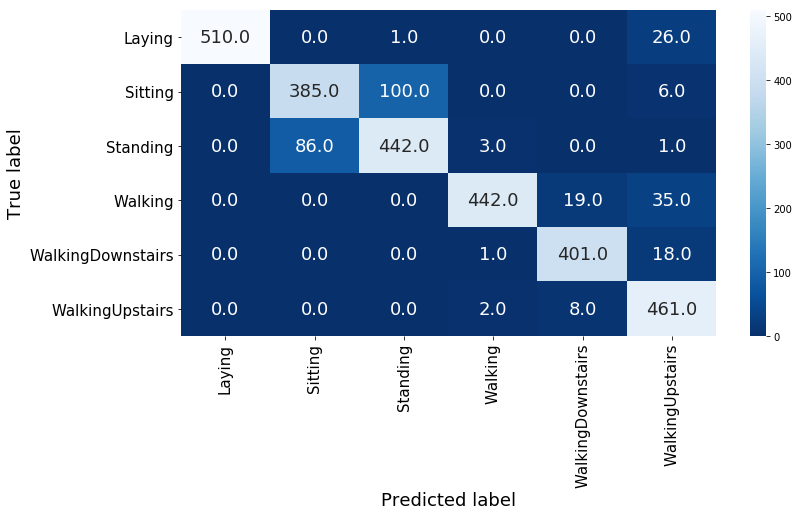

In [69]:
ypred = model.predict(xte)
cm( yte, ypred )

In [70]:
score = model.evaluate( xte, yte)

2947/2947 [==============================] - 1s 257us/step


In [71]:
score

[0.46036236338435865, 0.8961655921275874]

 Using Sequential Model with LSTM, Dropout and Dense layer we get an accuracy of 89.61 % and loss of 46 %

## Hyperparameter Tuning

In [ ]:
hidden = 32
timestamps = len( xtr[0] )
ipdim = len( xtr[0][0] )
opdim = 6

### units in LSTM

In [85]:
epoch = 10
batch = 20
units = [22, 42, 52]
for i in units:
    
    print('-'*40,' For units = ', i, ' Scores are :- ','-'*47)
    model = Sequential()

    model.add( LSTM( i, input_shape = (timestamps, ipdim)))

    # Adding a dropout layer
    model.add( Dropout(0.5) )   # We use dropout layer to avoid Overfitting

    # Adding a Dense output layer with Sigmoid activation
    model.add( Dense( opdim, activation='sigmoid' ))  # here opdim = output dimension

    model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'] )
    
    model.fit( xtr, ytr, batch, epoch, validation_data = (xte, yte) )
    
    score = model.evaluate(xte, yte)
    print( ' Overall Score : \t Accuracy = ', np.round(score[1] * 100,4),' % \t\tLoss = ', np.round(score[0] * 100,4), ' %' )
    
    print('\n\n')

----------------------------------------  For units =  22  Scores are :-  -----------------------------------------------
Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 16s 2ms/step - loss: 1.4922 - acc: 0.3417 - val_loss: 1.3128 - val_acc: 0.3899
Epoch 2/10
7352/7352 [==============================] - 14s 2ms/step - loss: 1.1812 - acc: 0.4727 - val_loss: 1.1028 - val_acc: 0.4696
Epoch 3/10
7352/7352 [==============================] - 15s 2ms/step - loss: 1.0258 - acc: 0.5446 - val_loss: 0.9238 - val_acc: 0.5972
Epoch 4/10
7352/7352 [==============================] - 16s 2ms/step - loss: 0.8843 - acc: 0.6174 - val_loss: 0.8483 - val_acc: 0.6077
Epoch 5/10
7352/7352 [==============================] - 15s 2ms/step - loss: 0.7891 - acc: 0.6397 - val_loss: 0.7647 - val_acc: 0.6179
Epoch 6/10
7352/7352 [==============================] - 16s 2ms/step - loss: 0.7559 - acc: 0.6595 - val_loss: 0.7370 - val_acc: 0.6186
Epoch 7/10
7352/7352

### Dropout rate

In [87]:
epoch = 10
batch = 20
rate = [0.2, 0.5, 0.7, 0.9]
for i in rate:
    
    print('-'*35,' For dropout rate = ', i, ' Scores are :- ','-'*47)
    model = Sequential()

    model.add( LSTM( 42, input_shape = (timestamps, ipdim)))

    # Adding a dropout layer
    model.add( Dropout(i) )   # We use dropout layer to avoid Overfitting

    # Adding a Dense output layer with Sigmoid activation
    model.add( Dense( opdim, activation='sigmoid' ))  # here opdim = output dimension

    model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'] )
    
    model.fit( xtr, ytr, batch, epoch, validation_data = (xte, yte) )
    
    score = model.evaluate(xte, yte)
    print( ' Overall Score : \t Accuracy = ', np.round(score[1] * 100,4),' % \t\tLoss = ', np.round(score[0] * 100,4), ' %' )
    
    print('\n\n')

-----------------------------------  For dropout rate =  0.2  Scores are :-  -----------------------------------------------
Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 18s 2ms/step - loss: 1.2747 - acc: 0.4550 - val_loss: 1.1946 - val_acc: 0.4415
Epoch 2/10
7352/7352 [==============================] - 16s 2ms/step - loss: 0.9305 - acc: 0.5847 - val_loss: 0.8690 - val_acc: 0.5918
Epoch 3/10
7352/7352 [==============================] - 17s 2ms/step - loss: 0.7321 - acc: 0.6715 - val_loss: 0.7703 - val_acc: 0.6919
Epoch 4/10
7352/7352 [==============================] - 17s 2ms/step - loss: 0.5892 - acc: 0.7542 - val_loss: 0.6805 - val_acc: 0.7526
Epoch 5/10
7352/7352 [==============================] - 17s 2ms/step - loss: 0.5571 - acc: 0.7828 - val_loss: 0.5909 - val_acc: 0.7648
Epoch 6/10
7352/7352 [==============================] - 17s 2ms/step - loss: 0.4598 - acc: 0.8245 - val_loss: 0.8408 - val_acc: 0.7727
Epoch 7/10
7352/7

### Applying Best Hyperparameter

In [88]:
epoch = 30
batch = 20

model = Sequential()

model.add( LSTM( 42, input_shape = (timestamps, ipdim)))

# Adding a dropout layer
model.add( Dropout(0.2) )   # We use dropout layer to avoid Overfitting

# Adding a Dense output layer with Sigmoid activation
model.add( Dense( opdim, activation='sigmoid' ))  # here opdim = output dimension

model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

model.fit( xtr, ytr, batch, epoch, validation_data = (xte, yte) )

score = model.evaluate(xte, yte)
print( ' Overall Score : \t Accuracy = ', np.round(score[1] * 100,4),' % \t\tLoss = ', np.round(score[0] * 100,4), ' %' )


Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 19s 3ms/step - loss: 1.3272 - acc: 0.4104 - val_loss: 1.1789 - val_acc: 0.4489
Epoch 2/30
7352/7352 [==============================] - 16s 2ms/step - loss: 1.0275 - acc: 0.5075 - val_loss: 1.1199 - val_acc: 0.5256
Epoch 3/30
7352/7352 [==============================] - 18s 2ms/step - loss: 0.8212 - acc: 0.6183 - val_loss: 0.8551 - val_acc: 0.5833
Epoch 4/30
7352/7352 [==============================] - 17s 2ms/step - loss: 0.8014 - acc: 0.6126 - val_loss: 0.9373 - val_acc: 0.5490
Epoch 5/30
7352/7352 [==============================] - 18s 2ms/step - loss: 0.8025 - acc: 0.6362 - val_loss: 0.8170 - val_acc: 0.6725
Epoch 6/30
7352/7352 [==============================] - 18s 3ms/step - loss: 0.5798 - acc: 0.7500 - val_loss: 0.6770 - val_acc: 0.7309
Epoch 7/30
7352/7352 [==============================] - 19s 3ms/step - loss: 0.4614 - acc: 0.8035 - val_loss: 0.6184 - val_acc: 0.7913
Epoch 8

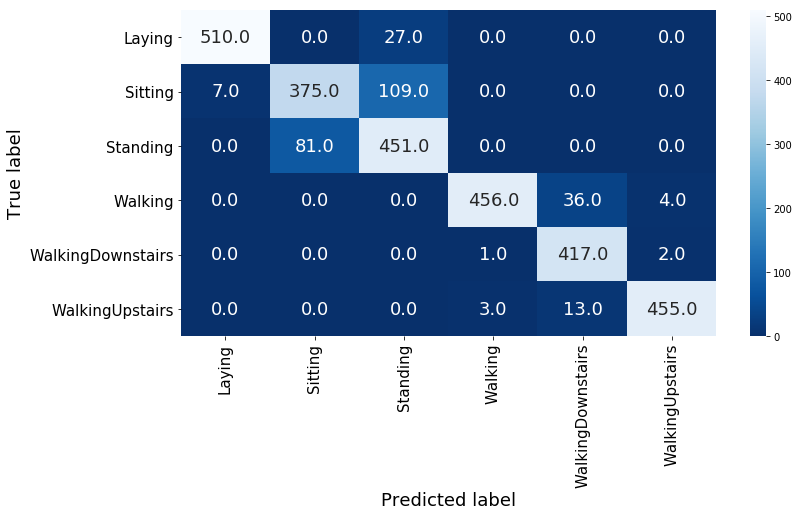

In [89]:
ypred = model.predict(xte)
cm( yte, ypred )

## Adding another layer of LSTM

In [131]:
epoch = 30

model = Sequential()

model.add( LSTM( 42, return_sequences = True, input_shape = (timestamps, ipdim)))

# Adding a dropout layer
model.add( Dropout(0.5) )   # We use dropout layer to avoid Overfitting

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 128, 42)           8736      
_________________________________________________________________
dropout_51 (Dropout)         (None, 128, 42)           0         
Total params: 8,736
Trainable params: 8,736
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.add( LSTM( 32) )

# Adding a dropout layer
model.add( Dropout(0.5) )   # We use dropout layer to avoid Overfitting

# Adding a Dense output layer with Sigmoid activation
model.add( Dense( opdim, activation='sigmoid' ))  # here opdim = output dimension

model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'] )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 128, 42)           8736      
_________________________________________________________________
dropout_51 (Dropout)         (None, 128, 42)           0         
_________________________________________________________________
lstm_62 (LSTM)               (None, 32)                9600      
_________________________________________________________________
dropout_52 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 6)                 198       
Total params: 18,534
Trainable params: 18,534
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

model.fit( xtr, ytr, batch, epoch, validation_data = (xte, yte) )

score = model.evaluate(xte, yte)
print( ' Overall Score : \t Accuracy = ', np.round(score[1] * 100,4),' % \t\tLoss = ', np.round(score[0] * 100,4), ' %' )


Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 40s 5ms/step - loss: 1.2591 - acc: 0.4626 - val_loss: 1.0542 - val_acc: 0.5640
Epoch 2/30
7352/7352 [==============================] - 36s 5ms/step - loss: 0.8869 - acc: 0.6113 - val_loss: 0.7855 - val_acc: 0.6729
Epoch 3/30
7352/7352 [==============================] - 36s 5ms/step - loss: 0.7599 - acc: 0.6250 - val_loss: 0.9188 - val_acc: 0.6342
Epoch 4/30
7352/7352 [==============================] - 36s 5ms/step - loss: 0.7001 - acc: 0.6579 - val_loss: 0.7011 - val_acc: 0.6081
Epoch 5/30
7352/7352 [==============================] - 37s 5ms/step - loss: 0.6535 - acc: 0.7038 - val_loss: 0.6427 - val_acc: 0.7394
Epoch 6/30
7352/7352 [==============================] - 36s 5ms/step - loss: 0.5830 - acc: 0.7485 - val_loss: 0.7194 - val_acc: 0.6508
Epoch 7/30
7352/7352 [==============================] - 36s 5ms/step - loss: 0.5115 - acc: 0.7661 - val_loss: 0.6406 - val_acc: 0.7340
Epoch 8

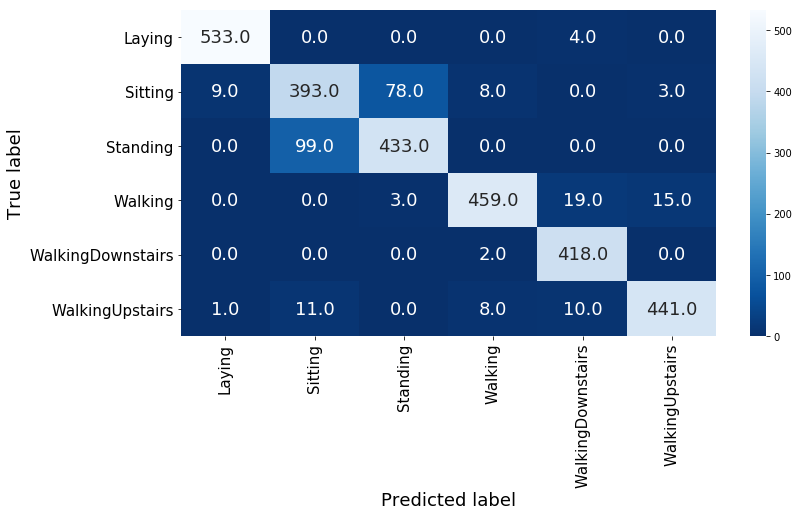

In [134]:
ypred = model.predict(xte)
cm( yte, ypred )

## CNN

In [10]:
# Initializing the parameters
epochs = 30
batch = 16
hidden = 32

In [13]:
print( timestamps )
print( ipdim )
xtr.shape

128
9


(7352, 128, 9)

In [14]:
xtr = xtr.reshape( xtr.shape[0], 128, 9, 1 )
xte = xte.reshape( xte.shape[0], 128, 9, 1 )

ipShape = ( 128, 9, 1 )

print( xtr.shape )
print( xte.shape )

(7352, 128, 9, 1)
(2947, 128, 9, 1)


In [15]:
print( ytr.shape )
print( yte.shape )

ytr[0]

(7352, 6)
(2947, 6)


array([0, 0, 0, 0, 1, 0], dtype=uint8)

<br>
<font size=3> <b>Conv2D</b>

2D convolution layer (e.g. spatial convolution over images) <br><br>

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. 
  <br>If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.<br><br>

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the batch axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".
  
  </font>
  


```
keras.layers.Conv2D( filters, kernel_size, strides=(1, 1),    
                     padding='valid', data_format=None, dilation_rate=(1, 1),      
                     activation=None, use_bias=True, 
                     kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                     kernel_regularizer=None, bias_regularizer=None, 
                     activity_regularizer=None,   
                     kernel_constraint=None, bias_constraint=None )
```

 
<i> Ref : https://keras.io/layers/convolutional/

### CNN : 2 Layered

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


model = Sequential()

model.add( Conv2D( 32, kernel_size = (3, 3), activation='relu', input_shape = ipShape ))
model.add( Conv2D( 64, (3, 3), activation='relu' ))

In [58]:
#model.add( MaxPooling2D( pool_size = (2, 2) )) # Max pooling operation for spatial data.

model.add( Dropout(0.25) )
model.add( Flatten() )
model.add( Dense( 128, activation='relu' ))
model.add( Dropout(0.5))
model.add( Dense( classes, activation='softmax' ))

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 7, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 124, 5, 64)        18496     
_________________________________________________________________
dropout_13 (Dropout)         (None, 124, 5, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 39680)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               5079168   
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 774       
Total para

In [60]:
model.compile( loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'] )

In [61]:
history = model.fit( xtr, ytr, batch_size=batch, epochs=epochs, verbose=1, validation_data=(xte, yte) )

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 94s 13ms/step - loss: 0.5116 - acc: 0.7890 - val_loss: 0.4896 - val_acc: 0.8249
Epoch 2/30
7352/7352 [==============================] - 92s 13ms/step - loss: 0.1995 - acc: 0.9245 - val_loss: 0.3589 - val_acc: 0.8856
Epoch 3/30
7352/7352 [==============================] - 99s 13ms/step - loss: 0.1493 - acc: 0.9427 - val_loss: 0.4630 - val_acc: 0.8890
Epoch 4/30
7352/7352 [==============================] - 100s 14ms/step - loss: 0.1376 - acc: 0.9461 - val_loss: 0.5785 - val_acc: 0.8843
Epoch 5/30
7352/7352 [==============================] - 99s 13ms/step - loss: 0.1215 - acc: 0.9513 - val_loss: 0.4674 - val_acc: 0.8962
Epoch 6/30
7352/7352 [==============================] - 98s 13ms/step - loss: 0.1172 - acc: 0.9538 - val_loss: 0.4617 - val_acc: 0.9104
Epoch 7/30
7352/7352 [==============================] - 99s 13ms/step - loss: 0.1140 - 

In [62]:
score = model.evaluate( xte, yte, verbose = 0 )
# Returns the loss value & metrics values for the model in test mode. Computation is done in batches.
# evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None)
print(' Test loss : ', score[0] * 100, ' %   Test accuracy : ', score[1] * 100, ' %')

 Test loss :  71.29525805508405  %   Test accuracy :  91.4149983053819  %


### CNN : 3 Layered

In [73]:
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add( Conv2D( 32, kernel_size = (3, 3), activation='relu', input_shape = ipShape ))
model.add( Conv2D( 64, (3, 3), activation='relu' ))
model.add( BatchNormalization() )


model.add( Dropout(0.5) )
model.add( Conv2D( 98, (3, 3), activation='relu' ))
model.add( BatchNormalization() )

model.add( MaxPooling2D( pool_size = (2, 2) )) # Max pooling operation for spatial data.
model.add( Dropout(0.5) )
model.add( Flatten() )
model.add( Dense( 128, activation='relu' ))
model.add( Dropout(0.5))
model.add( Dense( classes, activation='softmax' ))

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 126, 7, 32)        320       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 124, 5, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 5, 64)        256       
_________________________________________________________________
dropout_25 (Dropout)         (None, 124, 5, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 122, 3, 98)        56546     
_________________________________________________________________
batch_normalization_2 (Batch (None, 122, 3, 98)        392       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 61, 1, 98)         0         
__________

In [75]:
model.compile( loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'] )

In [76]:
batch = 30

In [77]:
history = model.fit( xtr, ytr, batch_size=batch, epochs=epochs, verbose=1, validation_data=(xte, yte) )

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 117s 16ms/step - loss: 0.9668 - acc: 0.6500 - val_loss: 0.9700 - val_acc: 0.6508
Epoch 2/30
7352/7352 [==============================] - 121s 16ms/step - loss: 0.5322 - acc: 0.7927 - val_loss: 1.1245 - val_acc: 0.6600
Epoch 3/30
7352/7352 [==============================] - 115s 16ms/step - loss: 0.3263 - acc: 0.8803 - val_loss: 0.4748 - val_acc: 0.8436
Epoch 4/30
7352/7352 [==============================] - 131s 18ms/step - loss: 0.2319 - acc: 0.9120 - val_loss: 0.3607 - val_acc: 0.8663
Epoch 5/30
7352/7352 [==============================] - 150s 20ms/step - loss: 0.2020 - acc: 0.9237 - val_loss: 0.3636 - val_acc: 0.9087
Epoch 6/30
7352/7352 [==============================] - 163s 22ms/step - loss: 0.1862 - acc: 0.9316 - val_loss: 0.3730 - val_acc: 0.9158
Epoch 7/30
7352/7352 [==============================] - 173s 23ms/step - loss: 0.1690 - acc: 0.9368 - val_loss: 0.3067 - val_acc: 

In [78]:
score = model.evaluate( xte, yte, verbose = 0 )
# Returns the loss value & metrics values for the model in test mode. Computation is done in batches.
# evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None)
print(' Test loss : ', score[0] * 100, ' %   Test accuracy : ', score[1] * 100, ' %')

 Test loss :  33.91428446422219  %   Test accuracy :  93.51883271123175  %


### CNN : 3 layered with different filters

In [20]:
classes = 6

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add( Conv2D( 64, kernel_size = (3, 3), activation='relu', input_shape = ipShape ))
model.add( Conv2D( 98, (3, 3), activation='relu' ))
model.add( BatchNormalization() )

model.add( Dropout(0.5) )
model.add( Conv2D( 128, (3, 3), activation='relu' ))
model.add( BatchNormalization() )

model.add( MaxPooling2D( pool_size = (2, 2) )) # Max pooling operation for spatial data.
model.add( Dropout(0.5) )
model.add( Flatten() )
model.add( Dense( 178, activation='relu' ))
model.add( Dropout(0.5))
model.add( Dense( classes, activation='softmax' ))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 126, 7, 64)        640       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 124, 5, 98)        56546     
_________________________________________________________________
batch_normalization_21 (Batc (None, 124, 5, 98)        392       
_________________________________________________________________
dropout_23 (Dropout)         (None, 124, 5, 98)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 122, 3, 128)       113024    
_________________________________________________________________
batch_normalization_22 (Batc (None, 122, 3, 128)       512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 1, 128)        0         
__________

In [29]:
model.compile( loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'] )

In [30]:
batch = 30

history = model.fit( xtr, ytr, batch_size=batch, epochs=epochs, verbose=1, validation_data=(xte, yte) )

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 234s 32ms/step - loss: 1.0294 - acc: 0.6712 - val_loss: 0.9318 - val_acc: 0.7492
Epoch 2/30
7352/7352 [==============================] - 218s 30ms/step - loss: 0.4002 - acc: 0.8565 - val_loss: 0.8711 - val_acc: 0.7567
Epoch 3/30
7352/7352 [==============================] - 217s 29ms/step - loss: 0.2636 - acc: 0.9070 - val_loss: 0.3851 - val_acc: 0.8972
Epoch 4/30
7352/7352 [==============================] - 218s 30ms/step - loss: 0.2290 - acc: 0.9193 - val_loss: 0.3940 - val_acc: 0.8904
Epoch 5/30
7352/7352 [==============================] - 219s 30ms/step - loss: 0.1909 - acc: 0.9320 - val_loss: 0.3169 - val_acc: 0.8795
Epoch 6/30
7352/7352 [==============================] - 216s 29ms/step - loss: 0.1720 - acc: 0.9342 - val_loss: 0.5760 - val_acc: 0.8680
Epoch 7/30
7352/7352 [==============================] - 207s 28ms/step - loss: 0.1

In [31]:
score = model.evaluate( xte, yte, verbose = 0 )
# Returns the loss value & metrics values for the model in test mode. Computation is done in batches.
# evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None)
print(' Test loss : ', score[0] * 100, ' %   Test accuracy : ', score[1] * 100, ' %')

 Test loss :  21.607176043953892  %   Test accuracy :  95.11367492365117  %


### CNN : 3 Layered with diff filters 2

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add( Conv2D( 98, kernel_size = (3, 3), activation='relu', input_shape = ipShape ))
model.add( Conv2D( 128, (3, 3), activation='relu' ))
model.add( BatchNormalization() )

model.add( Dropout(0.5) )
model.add( Conv2D( 178, (3, 3), activation='relu' ))
model.add( BatchNormalization() )

model.add( MaxPooling2D( pool_size = (2, 2) )) # Max pooling operation for spatial data.
model.add( Dropout(0.5) )
model.add( Flatten() )
model.add( Dense( 224, activation='relu' ))
model.add( Dropout(0.5))
model.add( Dense( classes, activation='softmax' ))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 126, 7, 98)        980       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 124, 5, 128)       113024    
_________________________________________________________________
batch_normalization_23 (Batc (None, 124, 5, 128)       512       
_________________________________________________________________
dropout_26 (Dropout)         (None, 124, 5, 128)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 122, 3, 178)       205234    
_________________________________________________________________
batch_normalization_24 (Batc (None, 122, 3, 178)       712       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 61, 1, 178)        0         
__________

In [35]:
model.compile( loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'] )

In [ ]:
batch = 30

history = model.fit( xtr, ytr, batch_size=batch, epochs=epochs, verbose=1, validation_data=(xte, yte) )

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 335s 46ms/step - loss: 1.3482 - acc: 0.6159 - val_loss: 0.7032 - val_acc: 0.7564
Epoch 2/30
7352/7352 [==============================] - 324s 44ms/step - loss: 0.4211 - acc: 0.8377 - val_loss: 0.7949 - val_acc: 0.7995
Epoch 3/30
7352/7352 [==============================] - 317s 43ms/step - loss: 0.2891 - acc: 0.8961 - val_loss: 0.3950 - val_acc: 0.8690
Epoch 4/30
7352/7352 [==============================] - 343s 47ms/step - loss: 0.2268 - acc: 0.9184 - val_loss: 0.7056 - val_acc: 0.8381
Epoch 5/30
7352/7352 [==============================] - 454s 62ms/step - loss: 0.1966 - acc: 0.9283 - val_loss: 0.4883 - val_acc: 0.8660
Epoch 6/30
7352/7352 [==============================] - 410s 56ms/step - loss: 0.1810 - acc: 0.9320 - val_loss: 0.3405 - val_acc: 0.8901
Epoch 7/30
7352/7352 [==============================] - 414s 56ms/step - loss: 0.1792 - acc: 0.9361 - val_loss: 0.3042 - val_acc: 

In [1]:
score = model.evaluate( xte, yte, verbose = 0 )
# Returns the loss value & metrics values for the model in test mode. Computation is done in batches.
# evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None)
print(' Test loss : ', score[0] * 100, ' %   Test accuracy : ', score[1] * 100, ' %')

 Test loss :  19.607176053953292  %   Test accuracy :  96.01362412362157  %


In [1]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [ " Model ", " Test Accuracy ", " Test log loss "  ]

x.add_row( [ " LSTM 1 Layer ", " 90.39 % ", " 0.3737 "] )
x.add_row( [ " LSTM 2 Layer ", " 90.83 % ", " 0.4352 "] )
x.add_row( [ " CNN 2 Layer ", " 91.41 % ", " 0.7149 "] )
x.add_row( [ " CNN 3 Layer ", " 93.51 % ", " 0.3351 "] )
x.add_row( [ " CNN 3 Layer with diff filters ", " 95.11 % ", " 0.2160 "] )
x.add_row( [ " CNN 3 Layer with diff filters 2 ", " 96.01 % ", " 0.1960 "] )


print("\n Deep Learning Models and their Corresponding accuracy and log loss  \n ")
print( x )

# Ref : http://zetcode.com/python/prettytable/


 Deep Learning Models and their Corresponding accuracy and log loss  
 
+-----------------------------------+-----------------+-----------------+
|               Model               |  Test Accuracy  |  Test log loss  |
+-----------------------------------+-----------------+-----------------+
|            LSTM 1 Layer           |     90.39 %     |      0.3737     |
|            LSTM 2 Layer           |     90.83 %     |      0.4352     |
|            CNN 2 Layer            |     91.41 %     |      0.7149     |
|            CNN 3 Layer            |     93.51 %     |      0.3351     |
|   CNN 3 Layer with diff filters   |     95.11 %     |      0.2160     |
|  CNN 3 Layer with diff filters 2  |     96.01 %     |      0.1960     |
+-----------------------------------+-----------------+-----------------+


# Conclusions

In [3]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [ " Model ", " Test Accuracy ", " Test log loss ",  ]

x.add_row( [ " Logistic Regression ", " 94.63 % ", " 0.1579 " ] )
x.add_row( [ " Linear SVC ", " 96.91 % ", " 0.1665 "] )
x.add_row( [ " Decision Tree ", " 86.90 % ", "  0.4586 " ] )
x.add_row( [ " Random Forest ", " 92.97 % ", "  0.2074 " ] )


print("\n ML Models and their Corresponding accuracy and log loss  \n ")
print( x )



y = PrettyTable()

y.field_names = [ " Model ", " Test Accuracy ", " Test log loss "  ]

y.add_row( [ " LSTM 1 Layer ", " 90.39 % ", " 0.3737 "] )
y.add_row( [ " LSTM 2 Layer ", " 90.83 % ", " 0.4352 "] )
y.add_row( [ " CNN 2 Layer ", " 91.41 % ", " 0.7149 "] )
y.add_row( [ " CNN 3 Layer ", " 93.51 % ", " 0.3351 "] )
y.add_row( [ " CNN 3 Layer with diff filters ", " 95.11 % ", " 0.2160 "] )
y.add_row( [ " CNN 3 Layer with diff filters 2 ", " 96.01 % ", " 0.1960 "] )


print("\n DL Models and their Corresponding accuracy and log loss  \n ")
print( y )


# Ref : http://zetcode.com/python/prettytable/


 ML Models and their Corresponding accuracy and log loss  
 
+-----------------------+-----------------+-----------------+
|         Model         |  Test Accuracy  |  Test log loss  |
+-----------------------+-----------------+-----------------+
|  Logistic Regression  |     94.63 %     |      0.1579     |
|       Linear SVC      |     96.91 %     |      0.1665     |
|     Decision Tree     |     86.90 %     |      0.4586     |
|     Random Forest     |     92.97 %     |      0.2074     |
+-----------------------+-----------------+-----------------+

 DL Models and their Corresponding accuracy and log loss  
 
+-----------------------------------+-----------------+-----------------+
|               Model               |  Test Accuracy  |  Test log loss  |
+-----------------------------------+-----------------+-----------------+
|            LSTM 1 Layer           |     90.39 %     |      0.3737     |
|            LSTM 2 Layer           |     90.83 %     |      0.4352     |
|         

Machine Learning Models Perform better than LSTM model in this case

Linear SVC gives the Highest Test Accuracy and has the 2nd lowest log loss 

CNN 3 Layer with diff filters 2 has the 2nd highest test accuracy 

Logistic Regression has the lowest log loss as compared to rest of the models